### Importing Libraries

In [1]:
import numpy as np
#from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# SciPy

SciPy provides a large number of functions that are useful for different types of scientific and engineering applications. Many SciPy functions operate on numpy arrays. For this course, we will primarily be using the SciPy.Stats sub-module. SciPy.Stats calculates density and mass functions, cumulative distribution functions, and quantile functions for many probability distributions. We will use these functions in the second and third courses of this series when we do more formal statistical analysis. If you are not familiar with probability distributions you can skip this section.


As a starting example, suppose we want to evaluate the cumulative distribution function (CDF) of the standard normal distribution at zero. Since zero is the median of the standard normal distribution, the resulting cumulative probability should be 1/2.

- The cumulative distribution function (CDF) tells you the total probability of a random variable being less than or equal to a specific value.

In [3]:
stats.norm.cdf(0)

0.5

- The CDF at 0, stats.norm.cdf(0), calculates the probability that a randomly chosen value from this distribution is less than or equal to 0.

Below are some additional examples of working with probability distributions:

In [6]:
# The median of a standard Student's t distribution with 10 degrees of freedom
print(stats.t(10).ppf(0.5))

# The 97.5 percentile of a standard Student's t distribution with 5 degrees of freedom
print(stats.t(5).ppf(0.975))

# The probability that a standard normal value is less than or equal to 3
print(stats.expon.cdf(3))

# The height of the standard normal density function at 1
print(stats.norm.pdf(1))

# The probability of getting exactly 3 heads in 10 flips of a fair coin
print(stats.binom(10, 0.5).pmf(3))

# The probability of getting 3 or fewer heads in 10 flips of a fair coin
print(stats.binom(10, 0.5).cdf(3))

6.805747424058503e-17
2.570581835636314
0.950212931632136
0.24197072451914337
0.11718749999999999
0.171875


# 5 Number Summary


In [2]:
# Generate fictional data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(100, 10, 95),  # 95 normal distributed values
    np.random.uniform(150, 200, 5)  # 5 potential outliers
])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])



In [3]:
df.head()

,Value
0,104.967142
1,98.617357
2,106.476885
3,115.230299
4,97.658466


In [4]:
df['Value'].describe()

count    100.000000
mean     102.882044
std       19.433730
min       73.802549
25%       94.281247
50%       99.460819
75%      106.703830
max      193.036529
Name: Value, dtype: float64

In [6]:
# Calculate IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

12.422583679848032


In [7]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

75.64737128612364
125.33770600551577


In [8]:
# Identify outliers
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("Outliers:")
print(outliers)



Number of outliers: 6
Outliers:
         Value
74   73.802549
95  190.900738
96  193.036529
97  150.347607
98  175.537365
99  170.870550


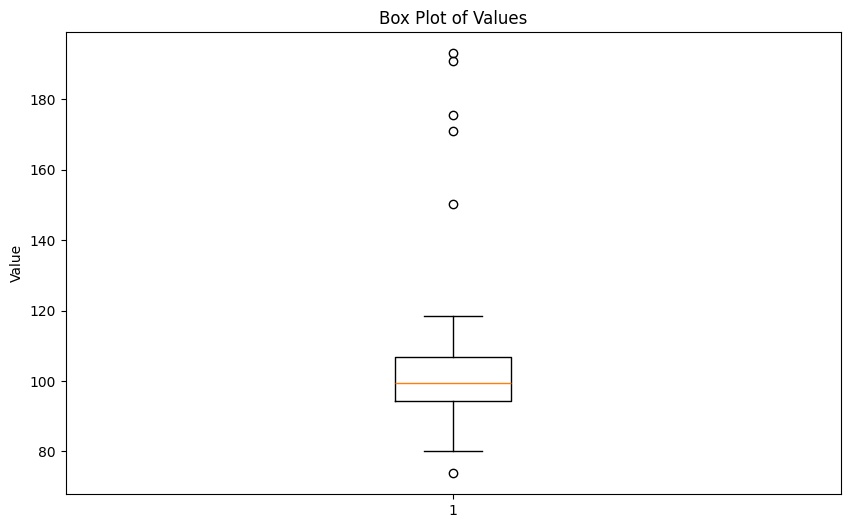

In [10]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Value'])
#df['Value'].plot(kind='box')
plt.title('Box Plot of Values')
plt.ylabel('Value')
plt.show()

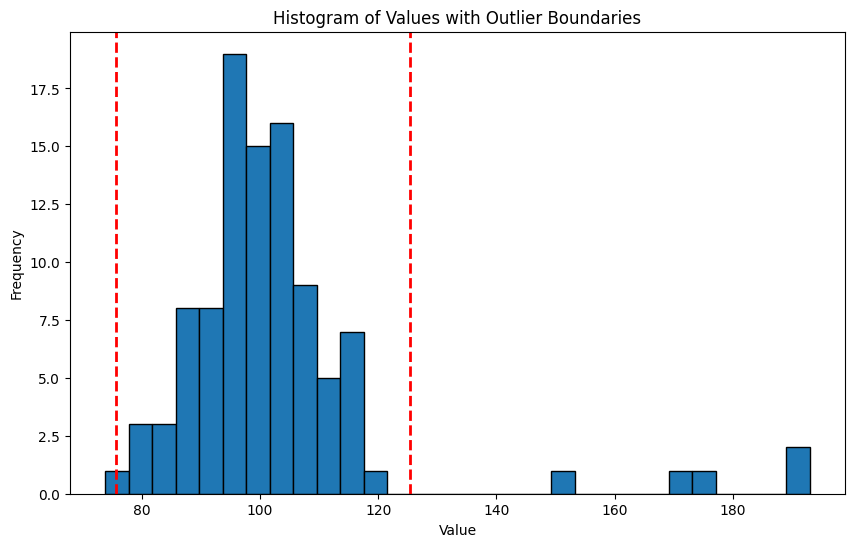

In [12]:
# Histogram with outlier boundaries
plt.figure(figsize=(10, 6))
plt.hist(df['Value'],bins=30, edgecolor='black')
#df['Value'].hist(bins=30, edgecolor='black')
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram of Values with Outlier Boundaries')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Data Standardization

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = {'Price': [250000, 300000, 500000, 800000, 200000],
        'Size': [1200, 1800, 2500, 3200, 1500]}
df = pd.DataFrame(data)

In [3]:
df

,Price,Size
0,250000,1200
1,300000,1800
2,500000,2500
3,800000,3200
4,200000,1500


In [4]:
scaler = StandardScaler()

# Fit the scaler to the data and transform the features
df[['Price', 'Size']] = scaler.fit_transform(df[['Price', 'Size']])

In [5]:
df

,Price,Size
0,-0.727273,-1.162192
1,-0.500000,-0.332055
2,0.409091,0.636438
3,1.772727,1.604931
4,-0.954545,-0.747123


In [6]:
df.describe()

,Price,Size
count,5.000000,5.000000
mean,0.000000,0.000000
std,1.118034,1.118034
min,-0.954545,-1.162192
25%,-0.727273,-0.747123
50%,-0.500000,-0.332055
75%,0.409091,0.636438
max,1.772727,1.604931


# Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = {'Exam_Score': [65, 80, 92, 70, 55],
        'Study_Hours': [5, 8, 12, 6, 3]}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

Original DataFrame:
   Exam_Score  Study_Hours
0          65            5
1          80            8
2          92           12
3          70            6
4          55            3


In [9]:
scaler = MinMaxScaler()

In [10]:
df[['Exam_Score', 'Study_Hours']] = scaler.fit_transform(df[['Exam_Score', 'Study_Hours']])

print("\nNormalized DataFrame:")
print(df)


Normalized DataFrame:
   Exam_Score  Study_Hours
0    0.270270     0.222222
1    0.675676     0.555556
2    1.000000     1.000000
3    0.405405     0.333333
4    0.000000     0.000000


In [11]:
df.describe()

,Exam_Score,Study_Hours
count,5.000000,5.000000
mean,0.470270,0.422222
std,0.383460,0.380058
min,0.000000,0.000000
25%,0.270270,0.222222
50%,0.405405,0.333333
75%,0.675676,0.555556
max,1.000000,1.000000


## The Exam Score Problem: Understanding the Empirical Rule with Z-Scores

In [12]:
import numpy as np
from scipy.stats import norm

In [21]:
# Set the random seed for reproducibility
np.random.seed(42)

In [22]:
# Generate exam scores for 100 students following a normal distribution
# Mean (µ) = 75, Standard Deviation (σ) = 8
exam_scores = np.random.normal(loc=75, scale=8, size=100)
exam_scores = np.round(exam_scores).astype(int)  # Round to nearest integer

In [23]:
# Create a Pandas DataFrame
df = pd.DataFrame({'Exam_Score': exam_scores})
df

,Exam_Score
0,79
1,74
2,80
3,87
4,73
...,...
95,63
96,77
97,77
98,75


In [24]:
# --- Part 1: Percentage between 67 and 83 ---
# Calculate z-scores
df['z_score'] = (df['Exam_Score'] - df['Exam_Score'].mean()) / df['Exam_Score'].std()

In [25]:
df['z_score']

0     0.654209
1    -0.030110
2     0.791073
3     1.749119
4    -0.166974
        ...   
95   -1.535612
96    0.380481
97    0.380481
98    0.106754
99   -0.166974
Name: z_score, Length: 100, dtype: float64

In [26]:
# Filter for scores between z-scores of -1 and +1
students_within_one_std = df[(df['z_score'] >= -1) & (df['z_score'] <= 1)]
students_within_one_std

,Exam_Score,z_score
0,79,0.654209
1,74,-0.030110
2,80,0.791073
4,73,-0.166974
5,73,-0.166974
...,...,...
94,72,-0.303838
96,77,0.380481
97,77,0.380481
98,75,0.106754


In [27]:
# Calculate the percentage
percentage_within_one_std = (len(students_within_one_std) / len(df)) * 100
percentage_within_one_std

67.0

In [28]:
print("\n--- Part 1 ---")
print(f"Percentage of students between scores 67 and 83: {percentage_within_one_std:.2f}%")


--- Part 1 ---
Percentage of students between scores 67 and 83: 67.00%


#### --- Part 2: Percentage above 91 ---

In [30]:
# Filter for scores with z-score above +2
students_above_two_std = df[df['z_score'] > 2]
students_above_two_std

,Exam_Score,z_score
31,90,2.15971


In [32]:
# Calculate the percentage
percentage_above_two_std = (len(students_above_two_std) / len(df)) * 100
percentage_above_two_std

1.0

In [33]:
print("\n--- Part 2 ---")
print(f"Percentage of students with scores above 91: {percentage_above_two_std:.2f}%")


--- Part 2 ---
Percentage of students with scores above 91: 1.00%


#### --- Part 3: Sarah's Score ---

In [34]:
# Find the z-score for the 84th percentile
sarahs_z_score = norm.ppf(0.84)  # Use the inverse CDF (percent point function)
sarahs_z_score

0.994457883209753

norm.ppf(0.84): This function calculates the Z-score (the number of standard deviations from the mean) corresponding to the 84th percentile of a standard normal distribution. The ppf stands for "percent point function," which is the inverse of the cumulative distribution function (CDF).

In [35]:
# Calculate Sarah's score
sarahs_score = (sarahs_z_score * df['Exam_Score'].std()) + df['Exam_Score'].mean()
sarahs_score

81.48604138680975

In [36]:
print("\n--- Part 3 ---")
print(f"Sarah's approximate score: {sarahs_score:.2f}")


--- Part 3 ---
Sarah's approximate score: 81.49


## Detecting Outliers with Z-Scores

In [37]:
# Sample website traffic data (daily visitors)
traffic_data = [200, 220, 235, 215, 198, 205, 240, 230, 225, 210, 
                195, 218, 232, 228, 208, 170, 185, 202, 216, 224, 
                238, 245, 212, 209, 221, 236, 500, 227, 219, 233]

In [38]:
df = pd.DataFrame({'Visitors': traffic_data})

In [39]:
df.head()

,Visitors
0,200
1,220
2,235
3,215
4,198


In [40]:
# Calculate the z-score for each day's traffic
df['z_score'] = (df['Visitors'] - df['Visitors'].mean()) / df['Visitors'].std()
df

,Visitors,z_score
0,200,-0.487876
1,220,-0.120130
2,235,0.155679
3,215,-0.212067
4,198,-0.524650
5,205,-0.395939
6,240,0.247615
7,230,0.063743
8,225,-0.028194
9,210,-0.304003


In [41]:
# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
outlier_threshold = 3

In [42]:
# Identify outliers
df['Outlier'] = np.where(np.abs(df['z_score']) > outlier_threshold, True, False)
df

,Visitors,z_score,Outlier
0,200,-0.487876,False
1,220,-0.120130,False
2,235,0.155679,False
3,215,-0.212067,False
4,198,-0.524650,False
5,205,-0.395939,False
6,240,0.247615,False
7,230,0.063743,False
8,225,-0.028194,False
9,210,-0.304003,False


In [43]:
# Print the outlier days
print("\nOutlier Days:")
print(df[df['Outlier'] == True])


Outlier Days:
    Visitors   z_score  Outlier
26       500  5.028308     True


### Q-Q Plot


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# Load the Iris dataset
iris = pd.read_csv('C:/Users/SPPL IT/Desktop/Study/Python/Statistics/Datasets/Iris.csv')


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Select the 'SepalLengthCm' column for normality testing
sepal_length = iris['SepalLengthCm']


In [8]:
stats.shapiro(sepal_length)

ShapiroResult(statistic=0.9760902723490532, pvalue=0.010181161454691156)

##### ^^^The code stats.shapiro(sepal_length) is used to perform the Shapiro-Wilk test for normality on the data in sepal_length.

Result: It returns two values: the test statistic and the p-value.
Test Statistic: Measures how close the data is to a normal distribution.
P-value: If the p-value is less than a significance level (commonly 0.05), it suggests that the data is not normally distributed.

In [13]:
# Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(sepal_length)
print(f"Shapiro-Wilk Test: Statistic={statistic:.3f}, p-value={p_value:.3f}")

## at 5% significance  , 
## we need to compare the p-value with 0.05,
# the calaculated p value is 0.01 < 0.05 so ---> we may reject the null hypothesis , Data not normally distributed


Shapiro-Wilk Test: Statistic=0.976, p-value=0.010


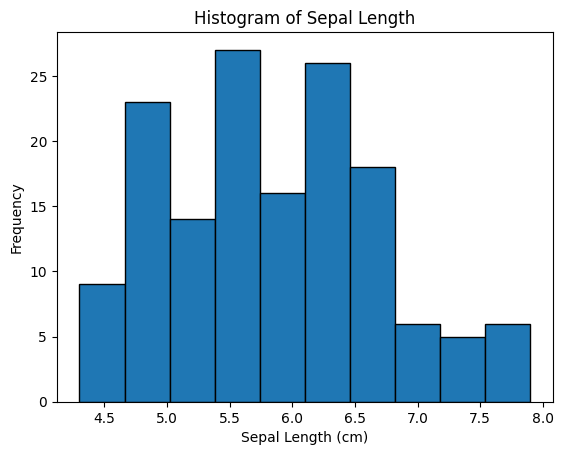

In [16]:
# Plot a histogram
plt.hist(sepal_length, bins=10, edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


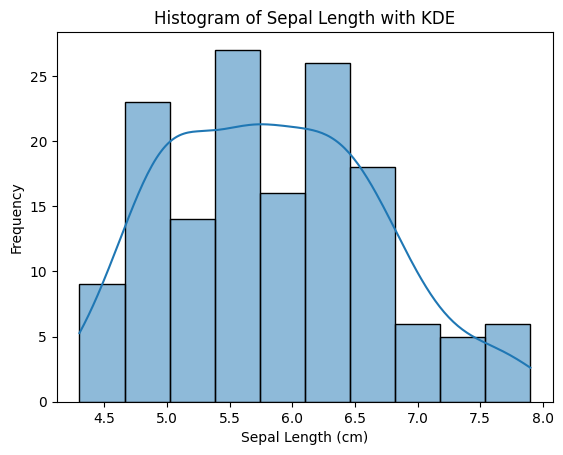

In [18]:
import seaborn as sns

# Plot a histogram with KDE using Seaborn
sns.histplot(sepal_length, bins=10, kde=True, edgecolor='black')
plt.title('Histogram of Sepal Length with KDE')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

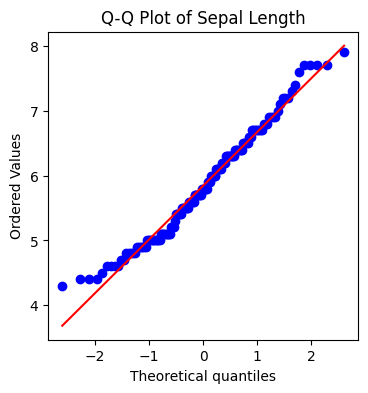

In [25]:
## Q-Q Plot 
fig,ax=plt.subplots(figsize=(4,4))
stats.probplot(sepal_length, plot=ax)
plt.title('Q-Q Plot of Sepal Length')
plt.show()